In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

## Mark and Recapture
N=M/m(n) -> N = ((M+1)/(m+1))*n (To prevent dividing by 0)

<IPython.core.display.Javascript object>


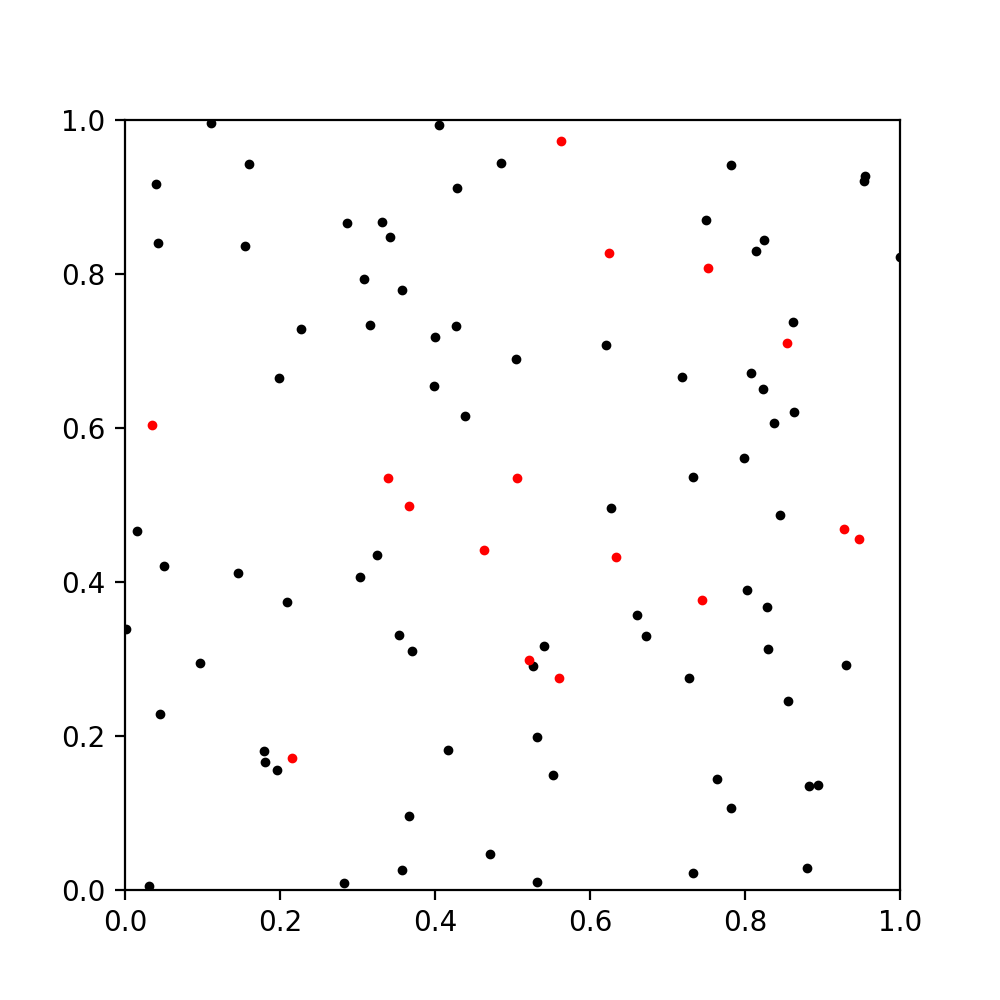

<IPython.core.display.Javascript object>


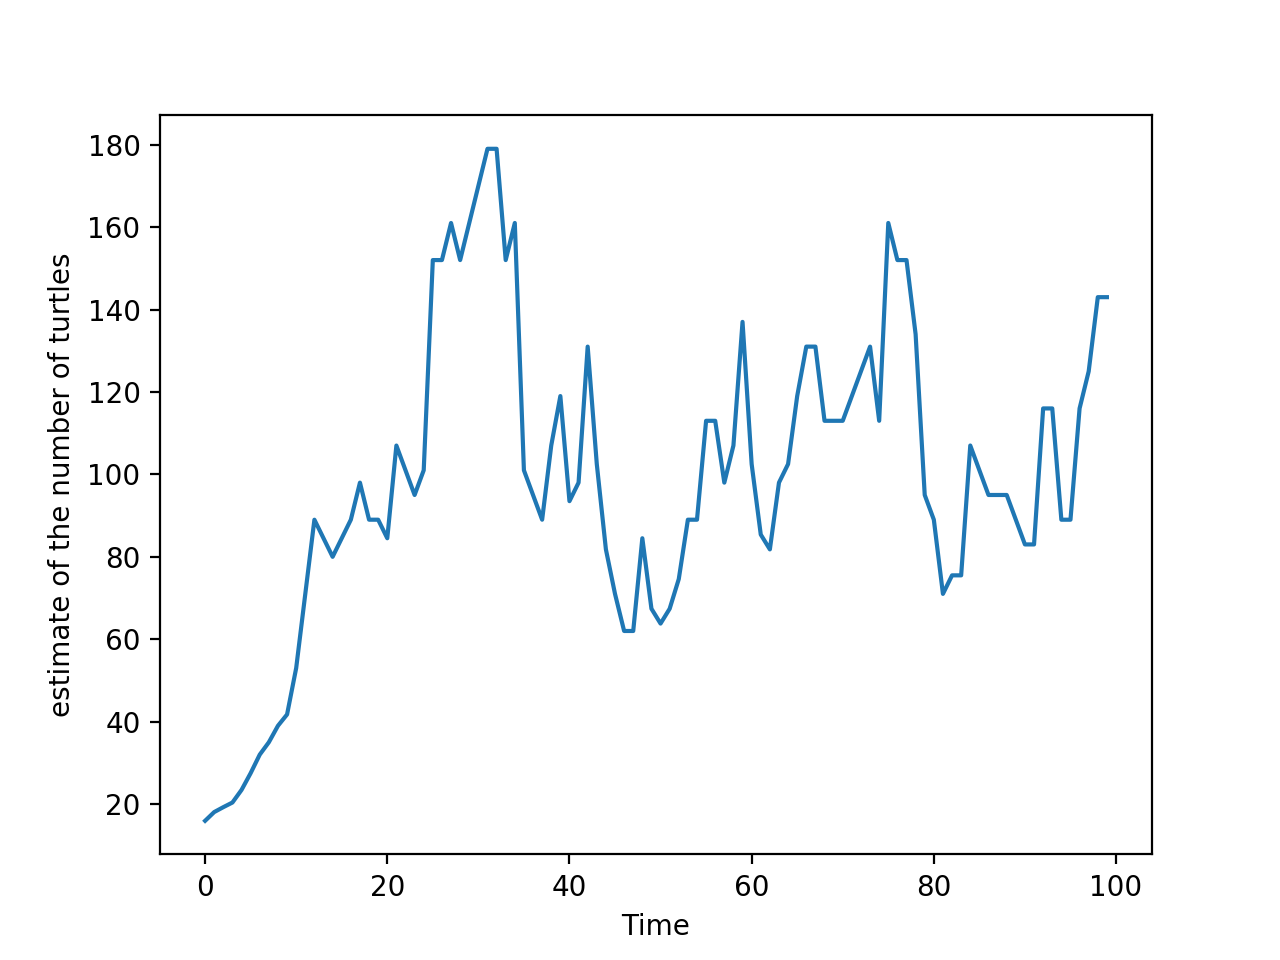

Text(0, 0.5, 'estimate of the number of turtles')

In [10]:
%matplotlib notebook

n_animals = 100 # # of animals
n_steps = 100 #steps 
vmin = .01
vmax = .05
trapsize = .4 #all critters with x&y below this will be considered captured


# x = np.ones(n_animals)*0.5 #x array of ones that is the size of the amount of animals there are
# y = np.ones(n_animals)*0.5 #y array of the same
x = np.random.uniform(size = n_animals)
y = np.random.uniform(size = n_animals)

vx = np.random.uniform(low = vmin, high = vmax, size = n_animals)*(2*np.random.randint(low = 0, high = 2, size = n_animals)-1)
vy = np.random.uniform(low = vmin, high = vmax, size = n_animals)*(2*np.random.randint(low = 0, high = 2, size = n_animals)-1)
#color = np.zeros(n_animals) #all animals start off with 0 color
   

    
#CAPTURE
color = np.where(np.logical_and(x < trapsize, y < trapsize), 1, 0)
nmarked = np.sum(color) 
estimation = np.zeros(n_steps)#At every point in time, we'll 

#PLOTTING
fig = plt.figure(figsize = (5,5))
#plt.plot(x,y,'k.'); #plot
plt.xlim(0,1);
plt.ylim(0,1);


#fig.canvas.draw() #makes it move
#time.sleep(0.01)

for t in range(n_steps): #time in steps range adding straight speed
    x += vx
    y += vy
    #Looping through all the animals and checking four characteristics with logical or

    vx = np.where(np.logical_or(x > 1, x < 0), -vx, vx)    
    vy = np.where(np.logical_or(y > 1, y < 0), -vy, vy)  
    
    #Recapture
    nrecapturedtotal = np.sum(np.logical_and(x < trapsize, y < trapsize))
    ncaptured = np.sum(np.logical_and(x < trapsize, y < trapsize)*color)
    estimation[t] = (nmarked+1)/(ncaptured+1)*(nrecapturedtotal)-1 #Chapman estimator
    
    plt.cla()
    plt.plot(x[color==0],y[color==0],'k.', markersize = 5);
    plt.plot(x[color==1],y[color==1],'r.', markersize = 5)
    plt.xlim(0,1);
    plt.ylim(0,1);
    fig.canvas.draw() #makes it move
    time.sleep(0.001)
    
plt.figure()
plt.plot(estimation)
plt.xlabel('Time')
plt.ylabel('estimate of the number of turtles')


# Mark and Recapture simulated over many trials

2. make some turtles be replaced by new turtles

1. graph another graph of all the trials 

In [14]:
%matplotlib notebook

n_animals = 100 # # of animals
n_steps = 10 #steps 
vmin = .01
vmax = .05
trapsize = .4 #all critters with x&y below this will be considered captured


# x = np.ones(n_animals)*0.5 #x array of ones that is the size of the amount of animals there are
# y = np.ones(n_animals)*0.5 #y array of the same
x = np.random.uniform(size = n_animals)
y = np.random.uniform(size = n_animals)

vx = np.random.uniform(low = vmin, high = vmax, size = n_animals)*(2*np.random.randint(low = 0, high = 2, size = n_animals)-1)
vy = np.random.uniform(low = vmin, high = vmax, size = n_animals)*(2*np.random.randint(low = 0, high = 2, size = n_animals)-1)
#color = np.zeros(n_animals) #all animals start off with 0 color
   

    
#CAPTURE
color = np.where(np.logical_and(x < trapsize, y < trapsize), 1, 0)
nmarked = np.sum(color) 
estimation = np.zeros(n_steps)#At every point in time, we'll 

#PLOTTING
fig = plt.figure(figsize = (5,5))
#plt.plot(x,y,'k.'); #plot
plt.xlim(0,1);
plt.ylim(0,1);


#fig.canvas.draw() #makes it move
#time.sleep(0.01)

for i in range(1, n_steps):
    estimation [i,:] = estimation[i-1,:] 
    for t in range(n_steps): #time in steps range adding straight speed
        x += vx
        y += vy
        #Looping through all the animals and checking four characteristics with logical or

        vx = np.where(np.logical_or(x > 1, x < 0), -vx, vx)    
        vy = np.where(np.logical_or(y > 1, y < 0), -vy, vy)  

        #Recapture
        nrecapturedtotal = np.sum(np.logical_and(x < trapsize, y < trapsize))
        ncaptured = np.sum(np.logical_and(x < trapsize, y < trapsize)*color)
        estimation[t] = (nmarked+1)/(ncaptured+1)*(nrecapturedtotal)-1 #Chapman estimator

        plt.cla()
        plt.plot(x[color==0],y[color==0],'k.', markersize = 5);
        plt.plot(x[color==1],y[color==1],'r.', markersize = 5)
        plt.xlim(0,1);
        plt.ylim(0,1);
        fig.canvas.draw() #makes it move
        time.sleep(0.001)

plt.figure()
plt.hist(estimation[-1,:], bins = 10) 
plt.plot(estimation)
plt.xlabel('Time')
plt.ylabel('estimate of the number of turtles')


<IPython.core.display.Javascript object>

IndexError: too many indices for array